# Add an Ingress-Nginx Controller on HPCC ECLWatch

## Prerequisites
* Install Helm.
* Deploy an HPCC system.
* Create an Ingress Controller:
    Follow this [tutorial](https://github.com/amy88ma/Ingress-Configuration/blob/7316d890b9b8c6dfb612c978344da048166adfe0/Jupyter%20Notebooks/Nginx_Install.ipynb) to install the Ingress-nginx controller.

## Deploy ECLWatch Ingress instance
This instance will route to the backend server eclwatch through the port 8010.  Create a YAML file, named eclwatch.yaml and copy in the following:

In [ ]:
apiVersion: networking.k8s.io/v1
kind: Ingress
metadata:
  name: eclwatch-ingress
  annotations:
    kubernetes.io/ingress.class: nginx
spec:
  rules:
  -  http:
      paths:
      - path: /
        pathType: Prefix
        backend:
         service:
           name: eclwatch
           port:
             number: 8010

Then save the file, run the instance by using:

In [ ]:
$ kubectl apply -f eclwatch.yaml

ingress.networking.k8s.io/eclwatch-ingress configured

## Test the Controller

After installing the NGINX controller using the previous tutorial in the "Prerequisites", the dynamic public IP address can be obtained with this command: 

In [1]:
kubectl get services -o wide -w nginx-ingress-ingress-nginx-controller

NAME                                     TYPE           CLUSTER-IP    EXTERNAL-IP     PORT(S)                      AGE   SELECTOR
nginx-ingress-ingress-nginx-controller   LoadBalancer   10.0.114.13   52.188.72.200   80:31719/TCP,443:32554/TCP   18h   app.kubernetes.io/component=controller,app.kubernetes.io/instance=nginx-ingress,app.kubernetes.io/name=ingress-nginx


This is used to test the routes for the ingress controller. Open a web browser to the IP address of your NGINX ingress controller, such as EXTERNAL_IP.  The application should be displayed in the web browser, as shown in the following example output:

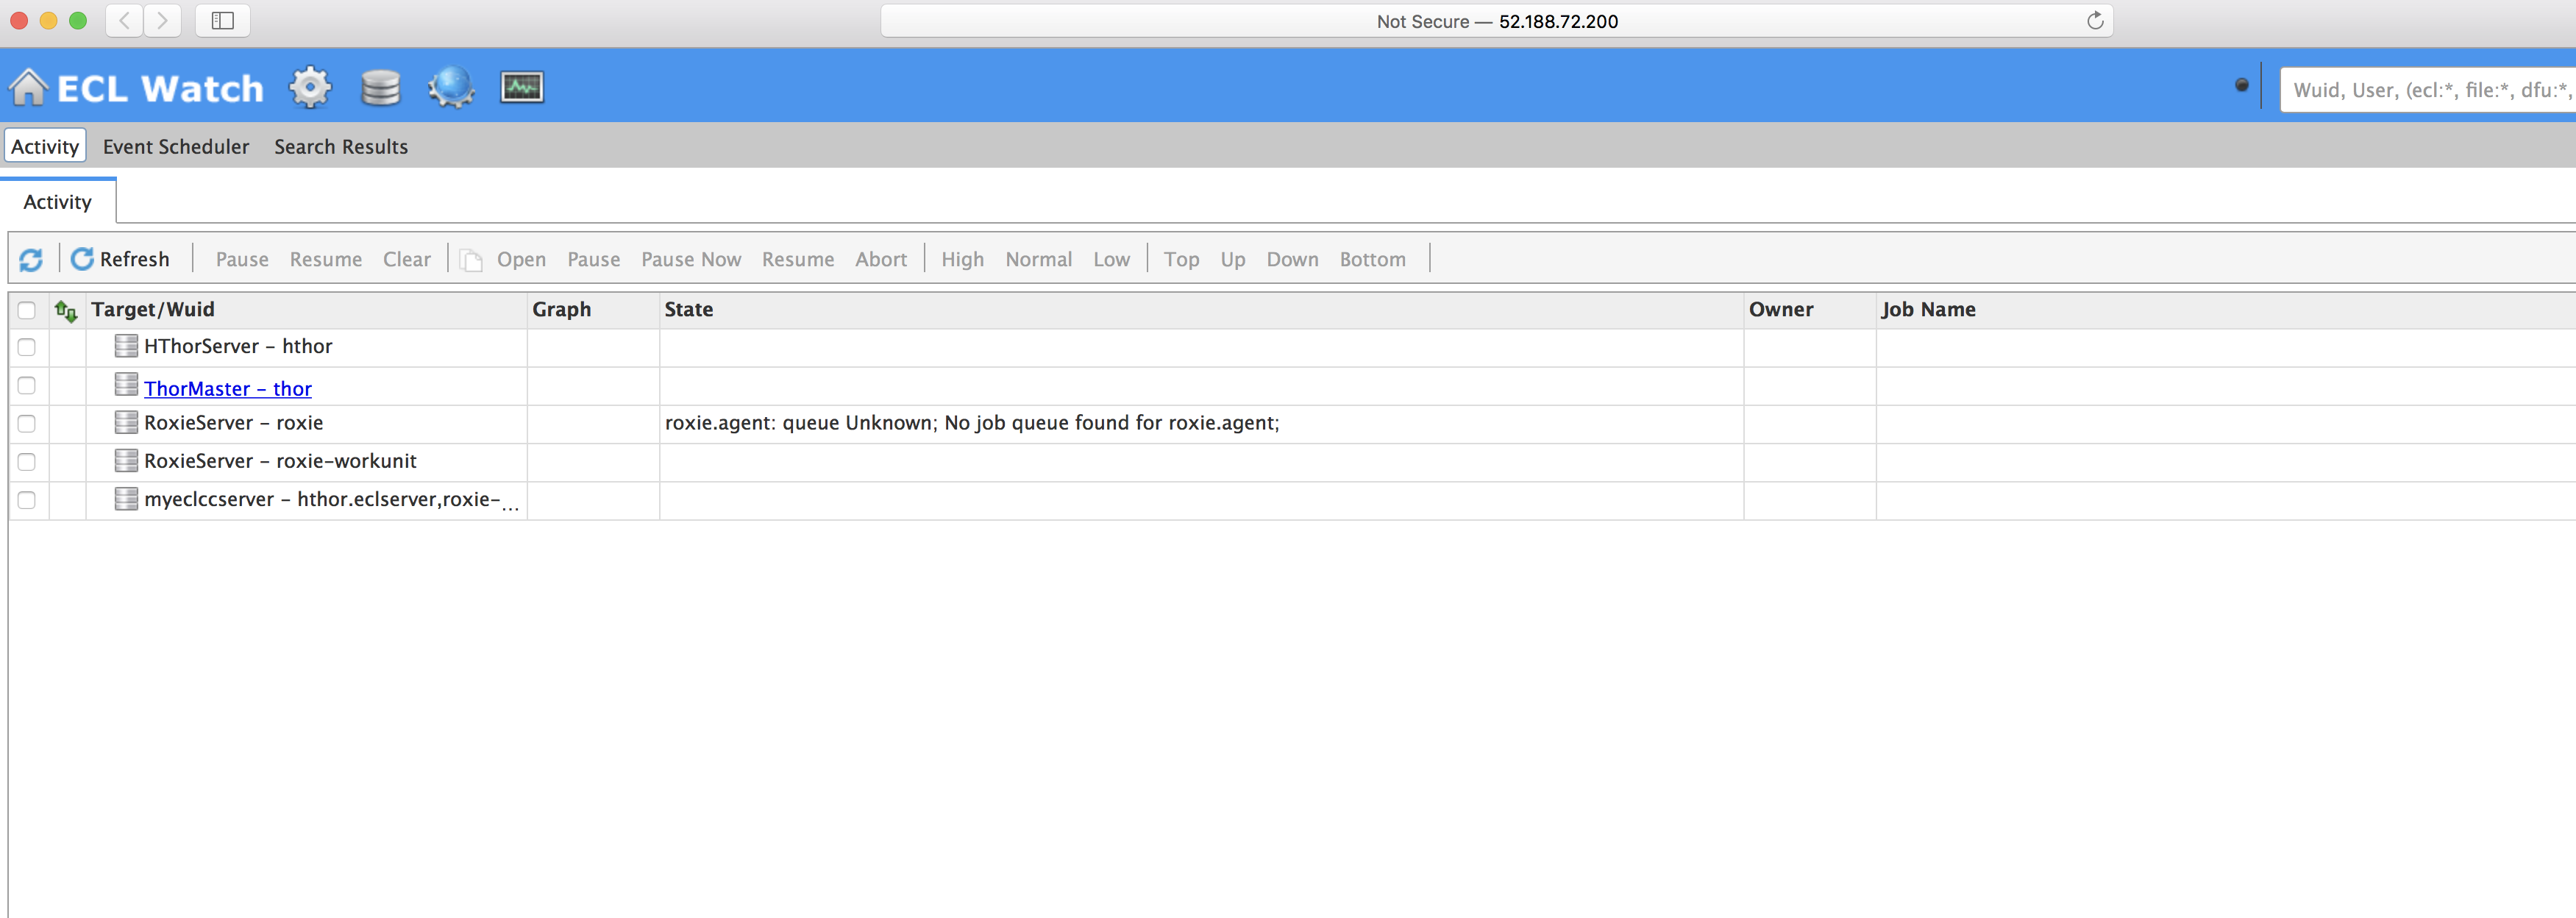

# Delete resources

Uninstall the NGINX ingress deployment:

In [ ]:
helm uninstall nginx-ingress

The example output shows the release is uninstalled:

In [ ]:
release "nginx-ingress" uninstalled

Remove the sample application and ingress route:

In [ ]:
$ kubectl delete -f eclwatch.yaml

$ kubectl delete -f eclwatch-ingress.yaml